In [6]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load and preprocess the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

X /= 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = OneHotEncoder(sparse=False, categories='auto')
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

# Initialize hyperparameters and weights
input_size = X_train.shape[1]
hidden_size = 128
output_size = 10
learning_rate = 0.001

np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = softmax(output_layer_input)

    # Compute loss
    loss = -np.sum(y_train_onehot * np.log(output_layer_output)) / len(X_train)

    # Backpropagation
    d_output = output_layer_output - y_train_onehot
    d_hidden = np.dot(d_output, weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, d_output)
    bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    weights_input_hidden -= learning_rate * np.dot(X_train.T, d_hidden)
    bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Evaluation
hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output_test = sigmoid(hidden_layer_input_test)
output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
output_layer_output_test = softmax(output_layer_input_test)

predicted_labels = np.argmax(output_layer_output_test, axis=1)
accuracy = np.sum(predicted_labels == y_test) / len(y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 0, Loss: 10.2684


<ipython-input-6-61c81804cf1c>:52: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_train_onehot * np.log(output_layer_output)) / len(X_train)
<ipython-input-6-61c81804cf1c>:52: RuntimeWarning: invalid value encountered in multiply
  loss = -np.sum(y_train_onehot * np.log(output_layer_output)) / len(X_train)
<ipython-input-6-61c81804cf1c>:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: 150.2939
Epoch 900, Loss: 111.8018
Test Accuracy: 0.5112


In [7]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load and preprocess the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

X /= 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = OneHotEncoder(sparse=False, categories='auto')
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

# Initialize hyperparameters and weights
input_size = X_train.shape[1]
hidden_size = 128
output_size = 10
learning_rate = 0.001

np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = softmax(output_layer_input)

    # Compute loss
    loss = -np.sum(y_train_onehot * np.log(output_layer_output)) / len(X_train)

    # Backpropagation
    d_output = output_layer_output - y_train_onehot
    d_hidden = np.dot(d_output, weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)
    
    weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, d_output)
    bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    weights_input_hidden -= learning_rate * np.dot(X_train.T, d_hidden)
    bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        # Calculate and print the singular values of the hidden layer weights
        _, singular_values, _ = np.linalg.svd(weights_input_hidden)
        print(f"Singular values of hidden layer at epoch {epoch}:")
        print(singular_values)

Epoch 0, Loss: 10.2684
Singular values of hidden layer at epoch 0:
[83.22786293 39.11249377 38.84911325 38.65775493 38.12025446 37.83488535
 37.56796916 37.38721385 36.92108912 36.65855902 36.30998402 36.15063935
 36.00174069 35.60513902 35.43007368 35.20991308 35.05586944 34.8103575
 34.5740888  34.47038177 34.22290111 34.10654145 33.8692197  33.76188431
 33.49717457 33.20161743 33.10123424 32.92960561 32.7777129  32.65273139
 32.53137357 32.22997578 32.01410003 31.98305775 31.80539877 31.52270183
 31.16217117 31.03319538 30.84144535 30.65737631 30.53553565 30.41775882
 30.29405837 30.17193715 30.00467673 29.94692294 29.69199018 29.64244239
 29.4064174  29.37422227 29.3061952  29.14497976 29.05836915 28.83562705
 28.70521891 28.57369428 28.43859713 28.31074602 28.06934956 27.99899232
 27.90540707 27.70321179 27.67547022 27.39047023 27.20149609 27.07473577
 26.9083828  26.85107178 26.57359812 26.52098661 26.44016079 26.4095295
 26.22682412 26.08688036 26.05166987 26.018809   25.7944489

<ipython-input-7-79b6ff9aef68>:52: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_train_onehot * np.log(output_layer_output)) / len(X_train)
<ipython-input-7-79b6ff9aef68>:52: RuntimeWarning: invalid value encountered in multiply
  loss = -np.sum(y_train_onehot * np.log(output_layer_output)) / len(X_train)
<ipython-input-7-79b6ff9aef68>:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 100, Loss: nan
Singular values of hidden layer at epoch 100:
[566.18258521 136.49627653 109.78147866  79.97844505  78.13648057
  63.12277688  54.59845719  48.75801693  46.87745101  41.07182266
  39.66797819  39.3969749   38.80763272  38.58036784  37.71993279
  37.3009376   37.13080232  37.00153009  36.57138459  36.41079366
  35.91512482  35.87487032  35.62965569  35.26779186  35.106741
  34.92791339  34.56858768  34.42809352  34.2695328   34.06436964
  33.92805482  33.73064141  33.22333623  33.05158062  32.80162997
  32.6414266   32.48732116  32.4023118   32.19995363  32.00817796
  31.92172706  31.79558635  31.47968446  31.31019391  31.19441895
  31.00711451  30.67598446  30.4883782   30.35453816  30.28835276
  30.095526    29.96105206  29.75268212  29.68532279  29.61390199
  29.37909637  29.33734521  29.19834929  29.05062822  28.8388549
  28.65625472  28.59531724  28.30012847  28.23752789  28.05490625
  27.93080433  27.86163503  27.72333171  27.33162805  27.23439002
  27.1815612

Epoch 0, Loss: 10.2684


<ipython-input-5-33d7a480c32b>:54: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_train_onehot * np.log(output_layer_output)) / len(X_train)
<ipython-input-5-33d7a480c32b>:54: RuntimeWarning: invalid value encountered in multiply
  loss = -np.sum(y_train_onehot * np.log(output_layer_output)) / len(X_train)
<ipython-input-5-33d7a480c32b>:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: 150.2939
Epoch 900, Loss: 111.8018


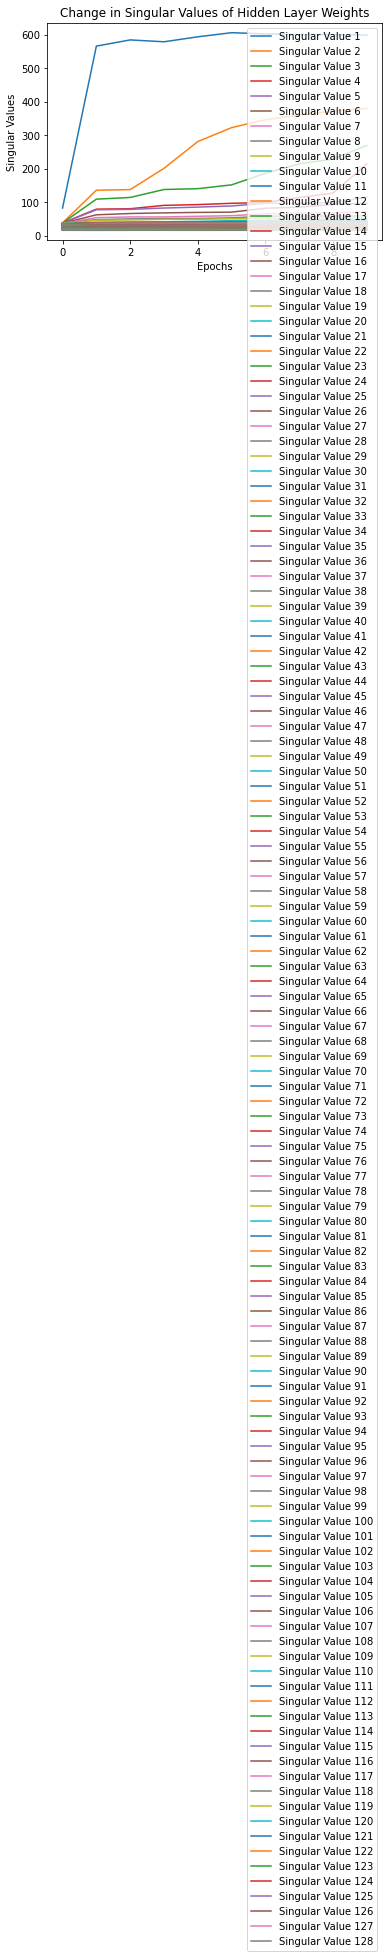

Test Accuracy: 0.5112


<ipython-input-5-33d7a480c32b>:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [5]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

X /= 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = OneHotEncoder(sparse=False, categories='auto')
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

# Initialize hyperparameters and weights
input_size = X_train.shape[1]
hidden_size = 128
output_size = 10
learning_rate = 0.001

np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Training loop
num_epochs = 1000
singular_values_history = []  # To store singular values over epochs

for epoch in range(num_epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = softmax(output_layer_input)

    # Compute loss
    loss = -np.sum(y_train_onehot * np.log(output_layer_output)) / len(X_train)

    # Backpropagation
    d_output = output_layer_output - y_train_onehot
    d_hidden = np.dot(d_output, weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, d_output)
    bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    weights_input_hidden -= learning_rate * np.dot(X_train.T, d_hidden)
    bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        # Calculate the singular values of the hidden layer weights
        _, singular_values, _ = np.linalg.svd(weights_input_hidden)
        singular_values_history.append(singular_values)

# Visualize the change in singular values over epochs
singular_values_history = np.array(singular_values_history)
for i in range(hidden_size):
    plt.plot(range(num_epochs // 100), singular_values_history[:, i], label=f'Singular Value {i+1}')

plt.xlabel('Epochs')
plt.ylabel('Singular Values')
plt.title('Change in Singular Values of Hidden Layer Weights')
plt.legend()
plt.show()

# Evaluation
hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output_test = sigmoid(hidden_layer_input_test)
output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
output_layer_output_test = softmax(output_layer_input_test)

predicted_labels = np.argmax(output_layer_output_test, axis=1)
accuracy = np.sum(predicted_labels == y_test) / len(y_test)
print(f"Test Accuracy: {accuracy:.4f}")
